In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
!rm -rf ./logs/

In [0]:
from google.colab import files
files.upload()

Saving birth_life_2010.txt to birth_life_2010.txt


{'birth_life_2010.txt': b'Country\tBirth rate\tLife expectancy\nVietnam\t1.822\t74.828243902\nVanuatu\t3.869\t70.819487805\nTonga\t3.911\t72.150658537\nTimor-Leste\t5.578\t61.999853659\nThailand\t1.579\t73.927658537\nSolomon Islands\t4.229\t67.465195122\nSingapore\t1.15\t81.641463415\nSamoa\t3.86\t72.306390244\nPhilippines\t3.142\t68.484317073\nPapua New Guinea\t3.951\t62.440609756\nNew Zealand\t2.16\t80.702439024\nNew Caledonia\t2.141\t76.301682927\nMyanmar\t2.002\t64.662097561\nMongolia\t2.504\t68.194975610\nMicronesia\t3.451\t68.764829268\nMalaysia\t2.635\t74.024560976\nMacao SAR, China\t1.092\t80.775317073\nLao PDR\t2.747\t67.064\nKorea\t1.22\t80.761951220\nJapan\t1.39\t82.932682927\nIndonesia\t2.117\t68.889658537\nHong Kong SAR, China\t1.108\t82.878048780\nGuam\t2.47\t75.994268293\nFrench Polynesia\t2.09\t75.076878049\nFiji\t2.668\t69.225829268\nDem. Rep. Korea\t2.022\t68.532146341\nChina\t1.598\t73.273097561\nCambodia\t2.581\t62.536219512\nBrunei\t2.042\t77.932024390\nAustralia\t

In [0]:
import numpy as np
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data("birth_life_2010.txt")
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
w = tf.Variable(0.0)
b = tf.Variable(0.0)
def prediction(x):
  return x * w + b
def squared_loss(y, y_predicted):
  return (y - y_predicted) ** 2
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [0]:
EPOCHS = 100
for epoch in range(EPOCHS):
  total_loss = 0.0
  for x, y in dataset:
    with tf.GradientTape() as tape:
      l = squared_loss(y, prediction(x))
      total_loss += l
    gradients = tape.gradient(l, [w,b])
    optimizer.apply_gradients(zip(gradients, [w,b]))
  print('Epoch {0}: {1}'.format(epoch, total_loss / n_samples))
print(f'w:{w.numpy()} b:{b.numpy()}')


Epoch 0: 1222.7601318359375
Epoch 1: 986.9451293945312
Epoch 2: 875.4566040039062
Epoch 3: 778.0278930664062
Epoch 4: 691.8187255859375
Epoch 5: 615.5225219726562
Epoch 6: 548.0004272460938
Epoch 7: 488.24542236328125
Epoch 8: 435.3636779785156
Epoch 9: 388.5672302246094
Epoch 10: 347.156982421875
Epoch 11: 310.5132751464844
Epoch 12: 278.088623046875
Epoch 13: 249.39808654785156
Epoch 14: 224.01283264160156
Epoch 15: 201.55250549316406
Epoch 16: 181.6809844970703
Epoch 17: 164.10057067871094
Epoch 18: 148.54766845703125
Epoch 19: 134.78929138183594
Epoch 20: 122.61892700195312
Epoch 21: 111.85343170166016
Epoch 22: 102.33153533935547
Epoch 23: 93.9102554321289
Epoch 24: 86.4627456665039
Epoch 25: 79.87616729736328
Epoch 26: 74.05219268798828
Epoch 27: 68.9026107788086
Epoch 28: 64.3498306274414
Epoch 29: 60.324913024902344
Epoch 30: 56.76704406738281
Epoch 31: 53.62227249145508
Epoch 32: 50.8431282043457
Epoch 33: 48.38706970214844
Epoch 34: 46.21694564819336
Epoch 35: 44.299503326416

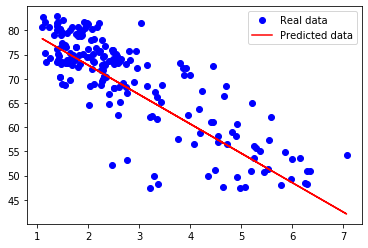

In [0]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()